In [1]:
%pylab inline
%matplotlib notebook
import requests



Populating the interactive namespace from numpy and matplotlib


/Users/orion/anaconda2/envs/py36/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### build the dipatcher object

In [2]:
from oda_api.api import DispatcherAPI


In [3]:
#host='10.194.169.161',port=32784
#host='0.0.0.0',port=5000
disp=DispatcherAPI(host='10.194.169.161',port=32784,instrument='mock')


### get the the list of instruments

In [4]:
instr_list=disp.get_instruments_list()
print(instr_list)

['isgri', 'jemx', 'polar']


### get the description of the instrument

In [5]:
disp.get_instrument_description('polar')


--------------
instrumet: polar

--------------
query_name: src_query
 name: src_name,  value: test,  units: str, 
 name: RA,  value: 0.0,  units: deg, 
 name: DEC,  value: 0.0,  units: deg, 
 name: T1,  value: 2001-12-11T00:00:00.000,  units: None, 
 name: T2,  value: 2001-12-11T00:00:00.000,  units: None, 

--------------
query_name: polar_parameters
 name: user_catalog,  value: None,  units: str, 
 name: [],  value: [],  units: names_list, 
 name: E1_keV,  value: 0.0,  units: keV, 
 name: E2_keV,  value: 10000.0,  units: keV, 

--------------
query_name: polar_lc_query
 product_name: polar_lc
 name: time_bin,  value: 1000.0,  units: sec, 


### get the description of the product

In [6]:
disp.get_product_description(instrument='polar',product_name='polar_lc')

--------------
parameters for  product polar_lc and instrument polar

--------------
instrumet: polar

--------------
query_name: src_query
 name: src_name,  value: test,  units: str, 
 name: RA,  value: 0.0,  units: deg, 
 name: DEC,  value: 0.0,  units: deg, 
 name: T1,  value: 2001-12-11T00:00:00.000,  units: None, 
 name: T2,  value: 2001-12-11T00:00:00.000,  units: None, 

--------------
query_name: polar_parameters
 name: user_catalog,  value: None,  units: str, 
 name: [],  value: [],  units: names_list, 
 name: E1_keV,  value: 0.0,  units: keV, 
 name: E2_keV,  value: 10000.0,  units: keV, 

--------------
query_name: polar_lc_query
 product_name: polar_lc
 name: time_bin,  value: 1000.0,  units: sec, 


### get the product, the case of Polar and synch requets

use `dry_run=True` to get the parameters configuration before to actually run the query

In [7]:
data=disp.get_product(instrument='polar',product='polar_lc',T1='2016-12-18T08:32:21.000',T2='2016-12-18T08:34:01.000',time_bin=0.1,verbose=True,dry_run=True)

waiting for remote response, please wait
query done succesfully!

--------------
instrumet: polar

--------------
query_name: src_query
 name: src_name,  value: test,  units: str, 
 name: RA,  value: 0.0,  units: deg, 
 name: DEC,  value: 0.0,  units: deg, 
 name: T1,  value: 2016-12-18T08:32:21.000,  units: None, 
 name: T2,  value: 2016-12-18T08:34:01.000,  units: None, 

--------------
query_name: polar_parameters
 name: user_catalog,  value: None,  units: str, 
 name: [],  value: [],  units: names_list, 
 name: E1_keV,  value: 0.0,  units: keV, 
 name: E2_keV,  value: 10000.0,  units: keV, 

--------------
query_name: polar_lc_query
 product_name: polar_lc
 name: time_bin,  value: 0.1,  units: sec, 


### now  skip the 'dry_run'  parameter, to run the query

In [8]:
data=disp.get_product(instrument='polar',product='polar_lc',T1='2016-12-18T08:32:21.000',T2='2016-12-18T08:34:01.000',time_bin=0.1)

waiting for remote response, please wait
query done succesfully!


In [9]:
rate = data['rate']
time = data['time']
rate_err = data['rate_err']

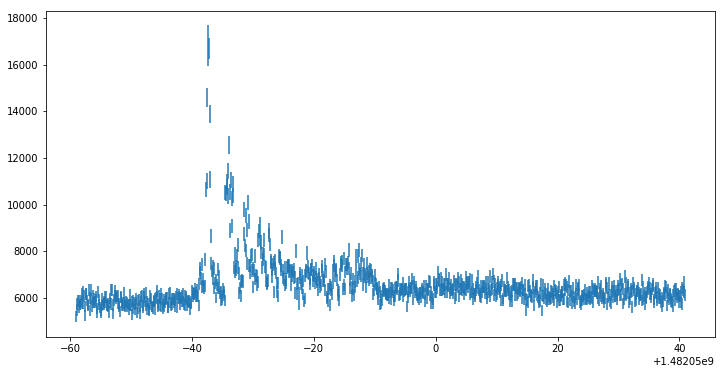

In [10]:
fig = plt.figure(figsize=(12,6))
plt.errorbar(time,rate,rate_err,ls="")
plt.show()

### get the product, the case of ISGRI and asynch requets

In [11]:
disp.get_instrument_description('isgri')


--------------
instrumet: isgri

--------------
query_name: src_query
 name: src_name,  value: test,  units: str, 
 name: RA,  value: 0.0,  units: deg, 
 name: DEC,  value: 0.0,  units: deg, 
 name: T1,  value: 2001-12-11T00:00:00.000,  units: None, 
 name: T2,  value: 2001-12-11T00:00:00.000,  units: None, 

--------------
query_name: isgri_parameters
 name: user_catalog,  value: None,  units: str, 
 name: scw_list,  value: [],  units: names_list, 
 name: radius,  value: 5.0,  units: deg, 
 name: max_pointings,  value: 50,  units: None, 
 name: E1_keV,  value: 10.0,  units: keV, 
 name: E2_keV,  value: 40.0,  units: keV, 
 name: osa_version,  value: None,  units: str, 

--------------
query_name: isgri_image_query
 product_name: isgri_image
 name: detection_threshold,  value: 0.0,  units: sigma, 
 name: image_scale_min,  value: None,  units: None, 
 name: image_scale_max,  value: None,  units: None, 

--------------
query_name: isgri_spectrum_query
 product_name: isgri_spectrum

----

In [12]:
disp.get_instrument_description('isgri')


--------------
instrumet: isgri

--------------
query_name: src_query
 name: src_name,  value: test,  units: str, 
 name: RA,  value: 0.0,  units: deg, 
 name: DEC,  value: 0.0,  units: deg, 
 name: T1,  value: 2001-12-11T00:00:00.000,  units: None, 
 name: T2,  value: 2001-12-11T00:00:00.000,  units: None, 

--------------
query_name: isgri_parameters
 name: user_catalog,  value: None,  units: str, 
 name: scw_list,  value: [],  units: names_list, 
 name: radius,  value: 5.0,  units: deg, 
 name: max_pointings,  value: 50,  units: None, 
 name: E1_keV,  value: 10.0,  units: keV, 
 name: E2_keV,  value: 40.0,  units: keV, 
 name: osa_version,  value: None,  units: str, 

--------------
query_name: isgri_image_query
 product_name: isgri_image
 name: detection_threshold,  value: 0.0,  units: sigma, 
 name: image_scale_min,  value: None,  units: None, 
 name: image_scale_max,  value: None,  units: None, 

--------------
query_name: isgri_spectrum_query
 product_name: isgri_spectrum

----

In [13]:
disp.get_product_description(instrument='isgri',product_name='isgri_lc')

--------------
parameters for  product isgri_lc and instrument isgri

--------------
instrumet: isgri

--------------
query_name: src_query
 name: src_name,  value: test,  units: str, 
 name: RA,  value: 0.0,  units: deg, 
 name: DEC,  value: 0.0,  units: deg, 
 name: T1,  value: 2001-12-11T00:00:00.000,  units: None, 
 name: T2,  value: 2001-12-11T00:00:00.000,  units: None, 

--------------
query_name: isgri_parameters
 name: user_catalog,  value: None,  units: str, 
 name: scw_list,  value: [],  units: names_list, 
 name: radius,  value: 5.0,  units: deg, 
 name: max_pointings,  value: 50,  units: None, 
 name: E1_keV,  value: 10.0,  units: keV, 
 name: E2_keV,  value: 40.0,  units: keV, 
 name: osa_version,  value: None,  units: str, 

--------------
query_name: isgri_lc_query
 product_name: isgri_lc
 name: time_bin,  value: 1000.0,  units: sec, 


### Reproducing no input products

In [14]:
data=disp.get_product(instrument='isgri',
                      product='isgri_lc',
                      T1='2003-03-15T23:27:40.0',
                      T2='2003-03-16T00:03:12.0',
                      time_bin=50,
                      query_type='Real',
                      osa_version='OSA10.2',
                      RA=255.986542,
                      DEC=-37.844167,
                      detection_threshold=5.0)

waiting for remote response, please wait
query failed!
Remote server message:-> failed: test has input products message: no input products found
Remote server error_message-> ddosa unknown exception
Remote server debug_message-> 


RemoteException: Remote analysis exception

we got an error, with the message: `no input products found`
lets inspect the parameters

In [15]:
data=disp.get_product(instrument='isgri',
                      product='isgri_lc',
                      T1='2003-03-15T23:27:40.0',
                      T2='2003-03-16T00:03:12.0',
                      time_bin=50,
                      query_type='Real',
                      osa_version='OSA10.2',
                      RA=255.986542,
                      DEC=-37.844167,
                      detection_threshold=5.0,
                      dry_run=True)

waiting for remote response, please wait
query done succesfully!

--------------
instrumet: isgri

--------------
query_name: src_query
 name: src_name,  value: test,  units: str, 
 name: RA,  value: 255.986542,  units: deg, 
 name: DEC,  value: -37.844167,  units: deg, 
 name: T1,  value: 2003-03-15T23:27:40.000,  units: None, 
 name: T2,  value: 2003-03-16T00:03:12.000,  units: None, 

--------------
query_name: isgri_parameters
 name: user_catalog,  value: None,  units: str, 
 name: scw_list,  value: [],  units: names_list, 
 name: radius,  value: 5.0,  units: deg, 
 name: max_pointings,  value: 50,  units: None, 
 name: E1_keV,  value: 10.0,  units: keV, 
 name: E2_keV,  value: 40.0,  units: keV, 
 name: osa_version,  value: OSA10.2,  units: str, 

--------------
query_name: isgri_lc_query
 product_name: isgri_lc
 name: time_bin,  value: 50.0,  units: sec, 


now we increse the search radius from 5.0 to 15.0 deg

In [18]:
data=disp.get_product(instrument='isgri',
                      product='isgri_lc',
                      T1='2003-03-15T23:27:40.0',
                      T2='2003-03-16T00:03:12.0',
                      time_bin=50,
                      query_type='Real',
                      osa_version='OSA10.2',
                      RA=255.986542,
                      DEC=-37.844167,
                      radius=15.)

waiting for remote response, please wait
query done succesfully!


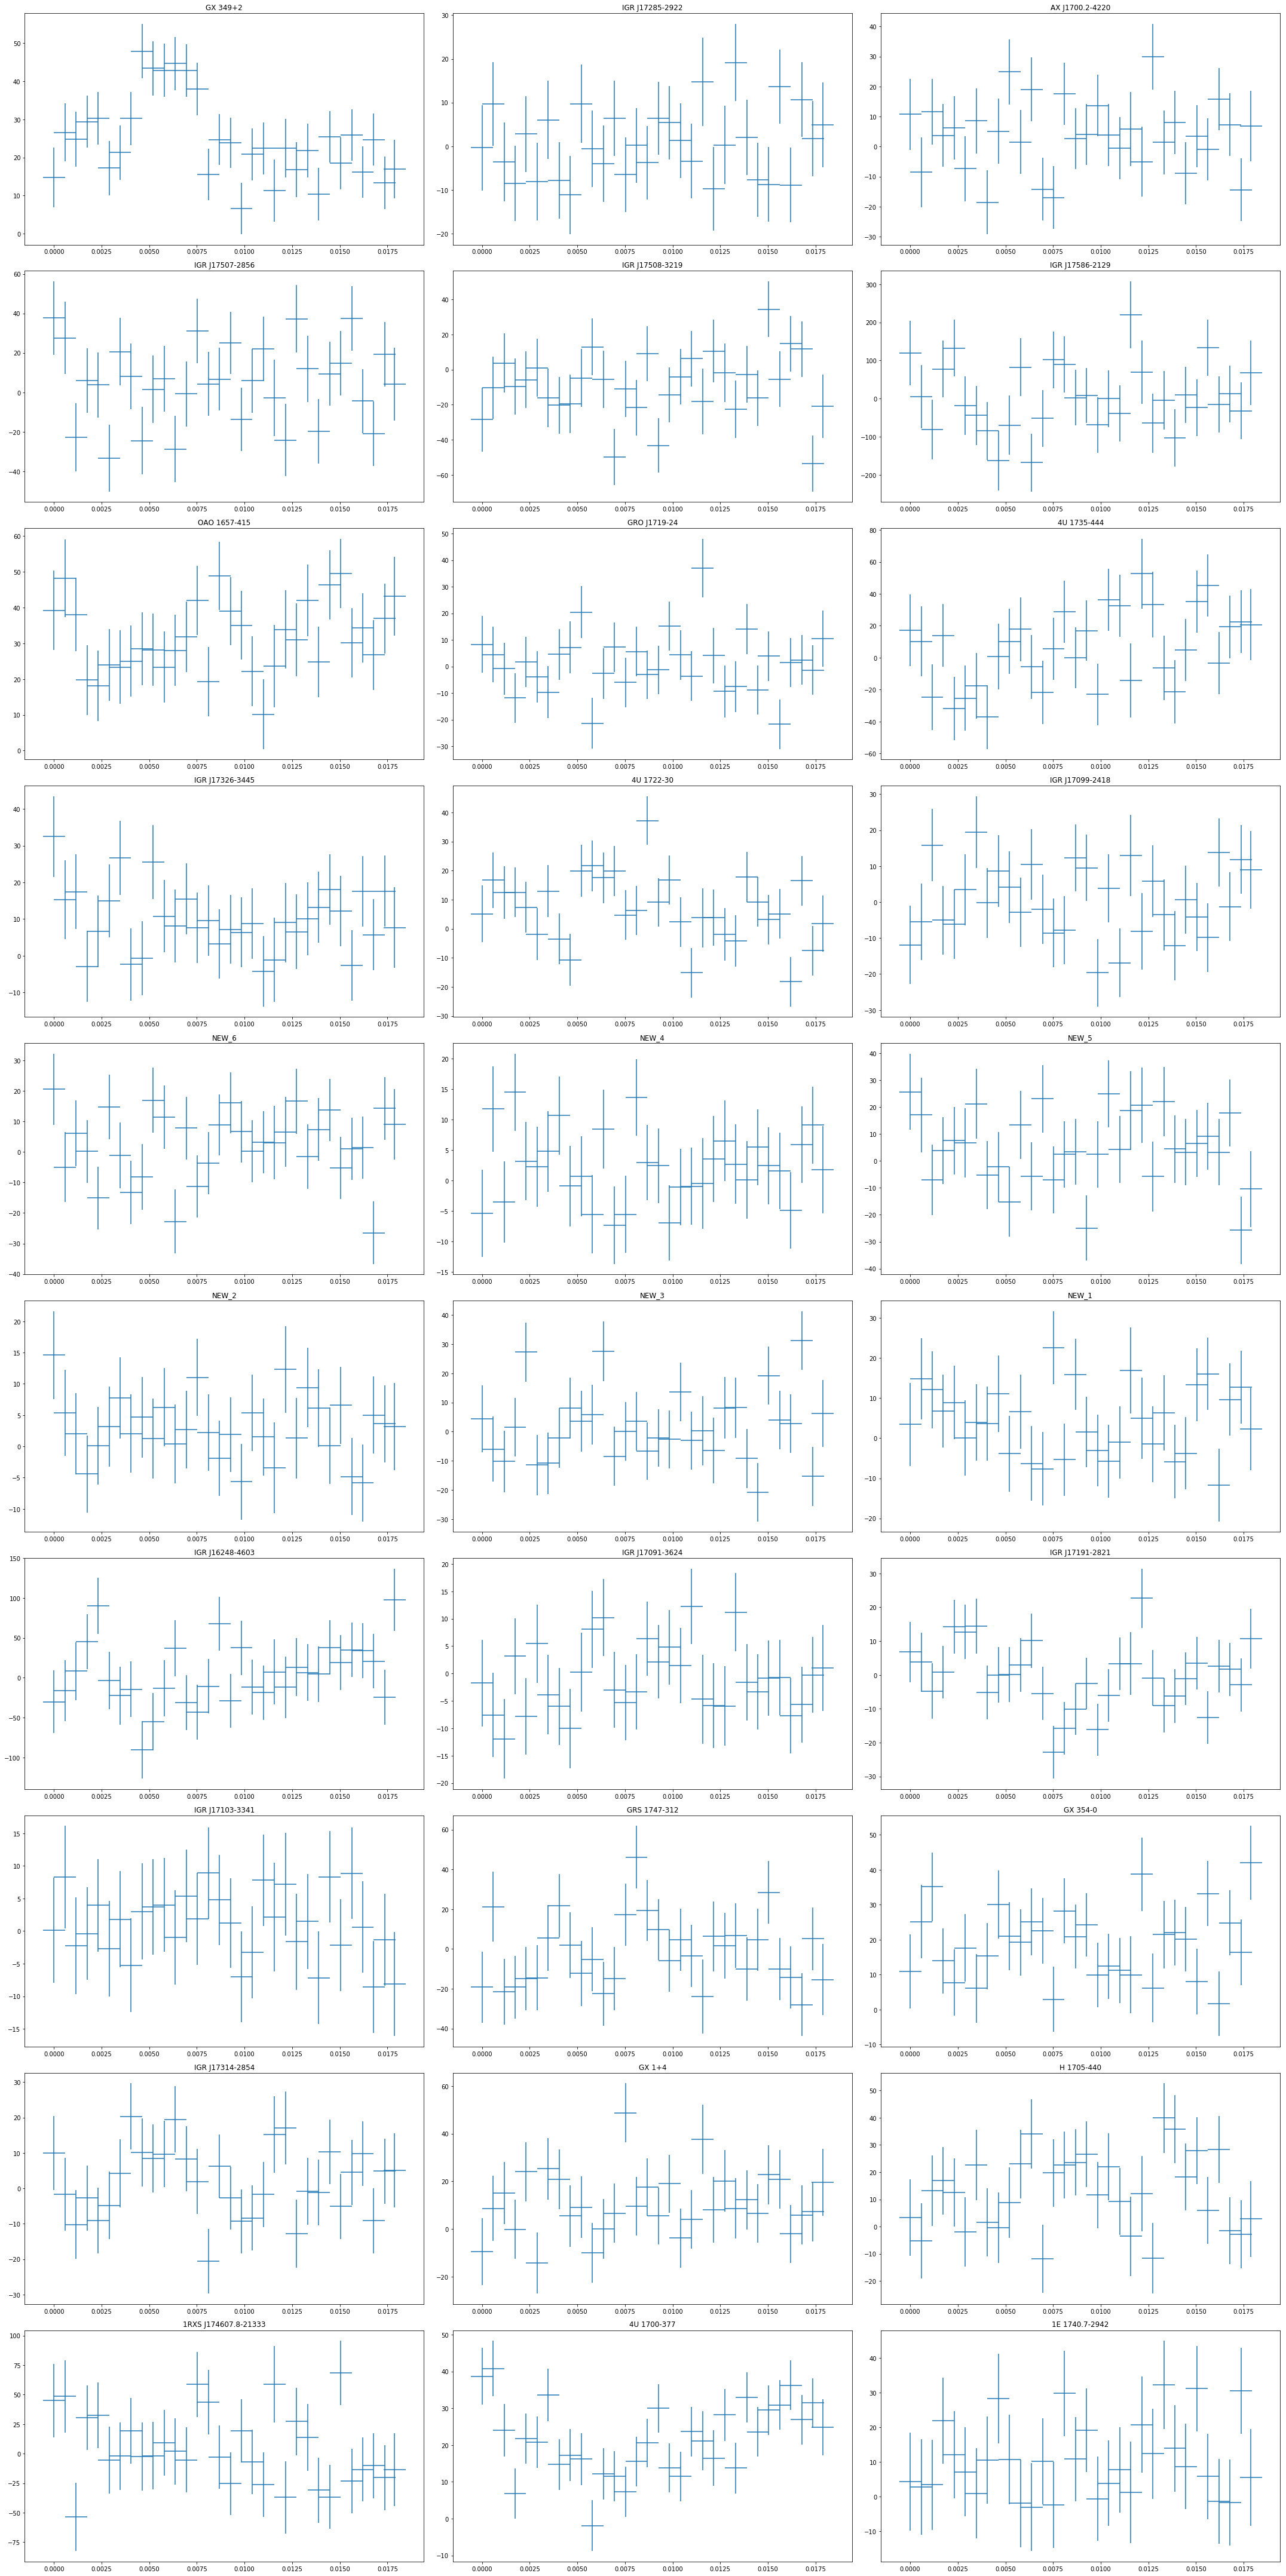

In [18]:
fig = plt.figure(figsize=(30,60))
for ID,_r in enumerate(data):
    plt.subplot(10,3,ID+1)
    x = np.array(_r['time'])
    x-=x.min()
    plt.errorbar(x,_r['rate'],_r['rate_err'],_r['time_del'],ls="")
    plt.title('%s'%_r['name'])
plt.tight_layout()
plt.show()

### Isgri image

In [23]:
data=disp.get_product(instrument='isgri',
                      product='isgri_image',
                      T1='2003-03-15T23:27:40.0',
                      T2='2003-03-16T00:03:12.0',
                      time_bin=50,
                      query_type='Real',
                      osa_version='OSA10.2',
                      RA=255.986542,
                      DEC=-37.844167,
                      detection_threshold=5.0,
                      radius=15.)

waiting for remote response, please wait
query done succesfully!


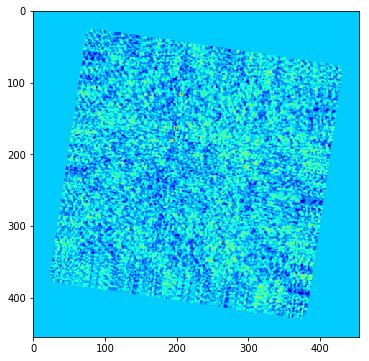

In [26]:
fig = plt.figure(figsize=(12,6))
plt.imshow(data,interpolation='nearest')
plt.show()